In [1]:
pip install brian2

     |████████████████████████████████| 1.2MB 3.4MB/s 
     |████████████████████████████████| 5.8MB 19.5MB/s 
  Created wheel for brian2: filename=Brian2-2.4.2-cp36-cp36m-linux_x86_64.whl size=1257527 sha256=3bf6ec3330da4442a9769608cd2915b1af0f9fd991d27ef1588f4a652a453a4b
  Stored in directory: /root/.cache/pip/wheels/5d/4b/cf/ef50e71df5479d67f981cbb17b1d842381019d27ba144d57de
Successfully built brian2
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


In [2]:
%matplotlib inline

In [3]:
from brian2 import *
import numpy as np

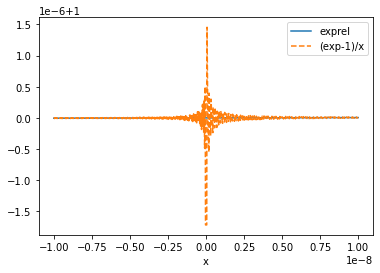

In [ ]:
#1.1
start_scope()
eqs='''
a=exprel(x) : 1
b=(exp(x)-1)/x : 1
x : 1
'''
g=NeuronGroup(1000,eqs)
g.x=np.linspace(-(1e-8),1e-8,1000)
plot(g.x,g.a,'C0',label='exprel')
plot(g.x,g.b,'C1--',label='(exp-1)/x')
xlabel('x')
legend()
show()

WARNING    /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
 [py.warnings]
WARNING    /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
 [py.warnings]
WARNING    /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous ax

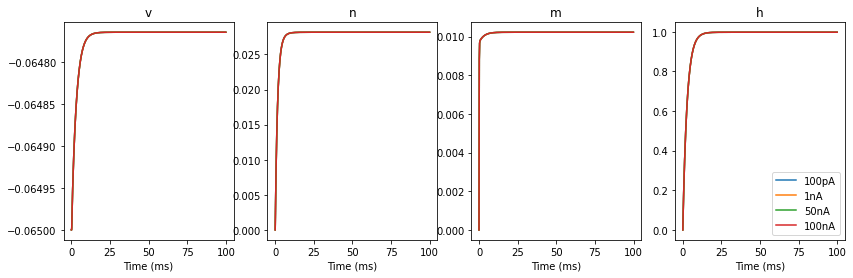

In [4]:
#1.2
start_scope()
C_m=200*pF
E_l=-65*mV
E_k=-90*mV
E_Na=50*mV
g_Na=20000/nohm
g_K=6000/nohm
g_l=10/nohm
VT=-63*mV
eqs='''
dv/dt=(g_l*(E_l-v)-g_Na*m**3*h*(v-E_Na)-g_K*n**4*(v-E_k)+I_ext)/C_m : volt
dn/dt=alpha_n*(1-n)-beta_n*n : 1
dm/dt=alpha_m*(1-m)-beta_m*m : 1
dh/dt=alpha_h*(1-h)-beta_h*h : 1
alpha_n=0.16/exprel((15*mV-v+VT)/5/mV)/ms : hertz
beta_n=0.5*exp((10*mV-v+VT)/40./mV)/ms : hertz
alpha_m=1.28/exprel((13*mV-v+VT)/4./mV)/ms : hertz
beta_m=1.4/exprel((v-40*mV-VT)/5/mV)/ms : hertz
alpha_h=0.128*exp((17*mV-v+VT)/18./mV)/ms : hertz
beta_h=4/(exp((40*mV-v+VT)/5/mV)+1)/ms : hertz
'''
params_names=['v','n','m','h']
I_exts=['100pA','1nA','50nA','100nA']
figure(figsize=(14,4))
for I_idx,I_ext in enumerate([100*pA,1*nA,50*nA,100*nA]):
  G=NeuronGroup(1,eqs,method='exponential_euler')
  G.v=E_l
  S=StateMonitor(G,('v','n','m','h'),(0,0,0,0))
  run(100*ms)
  for param_idx,param in enumerate([S.v,S.n,S.m,S.h]):
    subplot(1,len(I_exts),param_idx+1)
    plot(S.t/ms, param[0],label=I_exts[I_idx])
    xlabel('Time (ms)')
    title(params_names[param_idx])
legend()

WARNING    "I_ext" is an internal variable of group "neurongroup_2", but also exists in the run namespace with the value 100. * namp. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


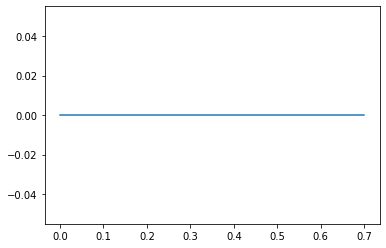

In [6]:
#1.3
start_scope()
eqs='''
dv/dt=(g_l*(E_l-v)-g_Na*m**3*h*(v-E_Na)-g_K*n**4*(v-E_k)+I_ext)/C_m : volt
dn/dt=alpha_n*(1-n)-beta_n*n : 1
dm/dt=alpha_m*(1-m)-beta_m*m : 1
dh/dt=alpha_h*(1-h)-beta_h*h : 1
alpha_n=0.16/exprel((15*mV-v+VT)/5/mV)/ms : hertz
beta_n=0.5*exp((10*mV-v+VT)/40./mV)/ms : hertz
alpha_m=1.28/exprel((13*mV-v+VT)/4./mV)/ms : hertz
beta_m=1.4/exprel((v-40*mV-VT)/5/mV)/ms : hertz
alpha_h=0.128*exp((17*mV-v+VT)/18./mV)/ms : hertz
beta_h=4/(exp((40*mV-v+VT)/5/mV)+1)/ms : hertz
I_ext : amp
'''
G=NeuronGroup(100,eqs,threshold='v>-40*mV',refractory=5*ms,method='exponential_euler')
G.I_ext='i*0.7*nA/99.'
G.v=E_l
M = SpikeMonitor(G)
run(2000*ms)
plot(G.I_ext/nA,M.count/2000/ms)
show()

WARNING    "I_ext" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value 1. * namp. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


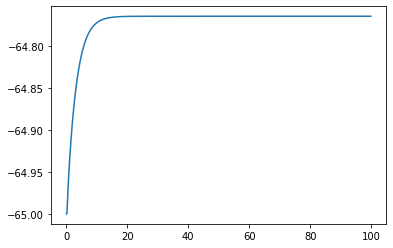

In [ ]:
#1.4
start_scope()
eqs='''
dv/dt=(g_l*(E_l-v)-g_Na*m**3*h*(v-E_Na)-g_K*n**4*(v-E_k)+I_ext)/C_m : volt
dn/dt=alpha_n*(1-n)-beta_n*n : 1
dm/dt=alpha_m*(1-m)-beta_m*m : 1
dh/dt=alpha_h*(1-h)-beta_h*h : 1
alpha_n=0.16/exprel((15*mV-v+VT)/5/mV)/ms : hertz
beta_n=0.5*exp((10*mV-v+VT)/40./mV)/ms : hertz
alpha_m=1.28/exprel((13*mV-v+VT)/4./mV)/ms : hertz
beta_m=1.4/exprel((v-40*mV-VT)/5/mV)/ms : hertz
alpha_h=0.128*exp((17*mV-v+VT)/18./mV)/ms : hertz
beta_h=4/(exp((40*mV-v+VT)/5/mV)+1)/ms : hertz
I_ext : amp
'''
G=NeuronGroup(1,eqs,method='exponential_euler')
G.I_ext=1*nA
G.v=E_l
G.run_regularly('I_ext += 1*nA',dt=1*ms)
M = StateMonitor(G,('v'),record=0)
run(100*ms)
plot(M.t/ms,M.v[0]/mV)
show()

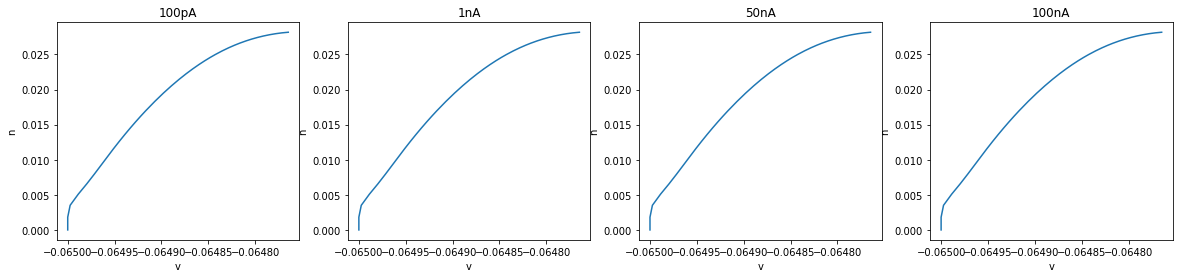

In [ ]:
#1.5
start_scope()
eqs='''
dv/dt=(g_l*(E_l-v)-g_Na*m**3*h*(v-E_Na)-g_K*n**4*(v-E_k)+I_ext)/C_m : volt
dn/dt=alpha_n*(1-n)-beta_n*n : 1
dm/dt=alpha_m*(1-m)-beta_m*m : 1
dh/dt=alpha_h*(1-h)-beta_h*h : 1
alpha_n=0.16/exprel((15*mV-v+VT)/5/mV)/ms : hertz
beta_n=0.5*exp((10*mV-v+VT)/40./mV)/ms : hertz
alpha_m=1.28/exprel((13*mV-v+VT)/4./mV)/ms : hertz
beta_m=1.4/exprel((v-40*mV-VT)/5/mV)/ms : hertz
alpha_h=0.128*exp((17*mV-v+VT)/18./mV)/ms : hertz
beta_h=4/(exp((40*mV-v+VT)/5/mV)+1)/ms : hertz
I_ext : amp
'''
G=NeuronGroup(4,eqs,method='exponential_euler')
G.v=E_l
G.I_ext[0]=100*pA
G.I_ext[1]=1*nA
G.I_ext[2]=50*nA
G.I_ext[3]=100*nA
M=StateMonitor(G,('v','n'),record=True)
run(50*ms)
figure(figsize=(20,4))
for idx,I in enumerate(['100pA','1nA','50nA','100nA']):
  subplot(1,4,idx+1)
  xlabel('v')
  ylabel('n')
  title(I)
  plot(M.v[idx],M.n[idx])
show()

No handles with labels found to put in legend.


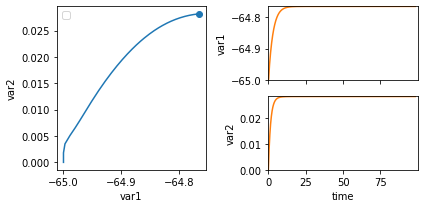

In [ ]:
#1.6
start_scope()
from draw_utils import phaseplane_animation
I_ext=200*pA
C_m=200*pF
E_l=-65*mV
E_k=-90*mV
E_Na=50*mV
g_Na=20000/nohm
g_K=6000/nohm
g_l=10/nohm
VT=-63*mV
eqs='''
dv/dt=(g_l*(E_l-v)-g_Na*m**3*h*(v-E_Na)-g_K*n**4*(v-E_k)+I_ext)/C_m : volt
dn/dt=alpha_n*(1-n)-beta_n*n : 1
dm/dt=alpha_m*(1-m)-beta_m*m : 1
dh/dt=alpha_h*(1-h)-beta_h*h : 1
alpha_n=0.16/exprel((15*mV-v+VT)/5/mV)/ms : hertz
beta_n=0.5*exp((10*mV-v+VT)/40./mV)/ms : hertz
alpha_m=1.28/exprel((13*mV-v+VT)/4./mV)/ms : hertz
beta_m=1.4/exprel((v-40*mV-VT)/5/mV)/ms : hertz
alpha_h=0.128*exp((17*mV-v+VT)/18./mV)/ms : hertz
beta_h=4/(exp((40*mV-v+VT)/5/mV)+1)/ms : hertz
'''
G=NeuronGroup(1,eqs,method='exponential_euler')
G.v=E_l
M=StateMonitor(G,('v','n'),record=0)
run(100*ms)
phaseplane_animation(M.t/ms,M.v[0]/mV,M.n[0])
show()

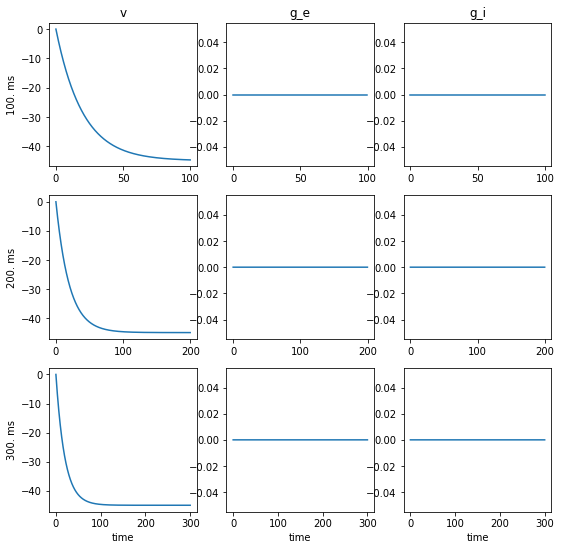

In [ ]:
#2.1
E_l=-60*mV
E_e=0*mV
E_i=-80*mV
g_l=9.99*nS
C_m=198*pF
tau_e=5*ms
tau_i=10*ms
I_ex=150*pA
eqs='''
dv/dt=(g_l*(E_l-v)+g_e*(E_e-v)+g_i*(E_i-v)+I_ex)/C_m : volt
dg_e/dt=-g_e/tau_e : siemens
dg_i/dt=-g_i/tau_i : siemens
'''
figure(figsize=(9,9))
for i,tspan in enumerate([100*ms,200*ms,300*ms]):
  start_scope()
  G=NeuronGroup(1,eqs,method='exponential_euler')
  G.v=0
  G.g_e=0
  G.g_i=0
  M=StateMonitor(G,('v','g_e','g_i'),record=True)
  run(tspan)
  subplot(3,3,3*i+1)
  plot(M.t/ms,M.v[0]/mV)
  ylabel(str(tspan))
  if i==0:
    title('v')
  elif i==2:
    xlabel('time')
  subplot(3,3,3*i+2)
  plot(M.t/ms,M.g_e[0]/nS)
  if i==0:
    title('g_e')
  elif i==2:
    xlabel('time')
  subplot(3,3,3*i+3)
  plot(M.t/ms,M.g_i[0]/nS)
  if i==0:
    title('g_i')
  elif i==2:
    xlabel('time')
show()





WARNING    "I_ex" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 150. * pamp. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


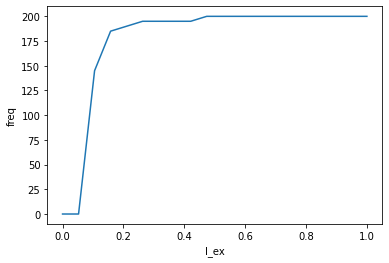

In [ ]:
#2.2
start_scope()
E_l=-60*mV
E_e=0*mV
E_i=-80*mV
g_l=9.99*nS
C_m=198*pF
tau_e=5*ms
tau_i=10*ms
eqs='''
dv/dt=(g_l*(E_l-v)+g_e*(E_e-v)+g_i*(E_i-v)+I_ex)/C_m : volt
dg_e/dt=-g_e/tau_e : siemens
dg_i/dt=-g_i/tau_i : siemens
I_ex : amp
'''
G=NeuronGroup(20,eqs,method='exponential_euler',threshold='v>-50*mV',refractory='5*ms')
G.v=E_l
G.I_ex=np.linspace(0,1,20)*nA
S=SpikeMonitor(G)
run(200*ms)
plot(G.I_ex/nA,S.count/200/ms)
xlabel('I_ex')
ylabel('freq')
show()

In [ ]:
#3
start_scope()
eqs='''
dv/dt=v-v**3-w+I : hertz
dw/dt=0.08*(v+0.7-0.8*w) : hertz
I : hertz
'''
G=NeuronGroup(5,eqs,method='euler')
G.I=np.array([0.,0.3,0.4,0.8,1.5])*hertz
G.v=-2*hertz
G.w=-0.5*hertz
M=StateMonitor(G,('v','w','I'),record=True)
run(200*ms)
